#Data Streaming Algorithms - HW1

##Question 1 - Sampling

$\textbf{The Algorithm}$\
We will suggest a version of the weighted reservoir sampling algorithm:\
\
• Init a tuple $(R,W_s) \rightarrow (0,0)$\
  $R$ - will save the sampled element $a_n$ \
  $W_s$ - will save the sum of all the elements from the stream\
\
For each new incoming element $a_i$ we will do:\
• Update $W_s \leftarrow W_s + a_i$\
• Randomize a variable from a uniform distribution $r \leftarrow Uniform(0, 1)$\
• Replace the sample in the reservoir if $r < \frac{a_i}{W_s}$\
\
\
To show the correctness of the algorithm we want to show that after the stream is over the final element in the reservoir $R$ is proportional to it's size $(a_i)$; or to be more accurate, we will show that $P(R=a_i) = \frac{a_i}{\sum_{j=0}^{n}a_j}$\
\
$\textbf{Proof by induction}$
####The Base n=1
$P(R=a_1)=\frac{a_1}{0+a_1}=1 \rightarrow$ first element is always sampled. \

####The Induction Step
Assuming the probability of sampling $a_i$ at time n=k is $P(R_k=a_i) = \frac{a_i}{\sum_{j=0}^{k}a_j}$  \
we will show that the probability of sampling $a_{k+1}$ at time n=k+1 is $(R_{k+1}=a_{k+1}) = \frac{a_{k+1}}{\sum_{j=0}^{k+1}a_j}$ \
and the probability to keep $a_i$ at time k+1 is $(R_{k+1}=a_i) = \frac{a_i}{\sum_{j=0}^{k+1}a_j}$ \
\
At time k+1 the algorithm will sample $a_{k+1}$ with probability $P(R_{k+1}=a_{k+1})=\frac{a_{k+1}}{a_{k+1} + \sum_{j=0}^{k}a_j} = \frac{a_{k+1}}{\sum_{j=0}^{k+1}a_j}$\
And it will have the previous element in the reservoir $a_i$ with probability 
$P(R_{k+1}=a_i) = P(R_{k}=a_i)(1-P(R_{k+1}=a_{k+1})) 
= \big(\frac{a_i}{\sum_{j=0}^{k}a_j})\cdot \big(1-\frac{a_{k+1}}{\sum_{j=0}^{k+1}a_j}) 
= \big(\frac{a_i}{\sum_{j=0}^{k}a_j}) \cdot \big(\frac{\sum_{j=0}^{k+1}a_j -a_{k+1}}{\sum_{j=0}^{k+1}a_j}) 
= \big(\frac{a_i}{\sum_{j=0}^{k}a_j}) \cdot \big(\frac{\sum_{j=0}^{k}a_j}{\sum_{j=0}^{k+1}a_j}) = \frac{a_i}{\sum_{j=0}^{k+1}a_j}$\
* We are assuming here that for $i \leq k \space$, $P(R_{k+1}=a_i\space | \space R_k \neq a_i)=0$  
\
\
$\textbf{Sketch size}$\
At any time, we will need to save $R$ and $W_s$ so without getting into the analysis by the bit we will have $O(2)$ 



##Question 2 - Morris

$\textbf{The Algorithm}$\
The algorithm that can describe Elinoy's proposal is the Morris algorithm with a small adjustment:\
• Initialize the counter X=0\
• When a positive item arrives (login), increase X by 1 with probability $\frac{1}{2^{x}}$\
• When a negative item arrives (logout), decrease the counter X by 1 (and down  to 0) with probability $\frac{1}{2^{x-1}}$\
• Otherwise, maintain the counter with its previous value X\
\
The final estimator will be $\hat{n} = 2^{x}-1$\
\
$\textbf{Proof by induction}$\
Since the algorithm was kept the same along with the estimator for positive events, the unbiase was proven in class, $E\big(2^{x}-1\big) = n \Rightarrow E\big(2^{x}\big) = n+1\space $  for positive events.\
We will show that $E\big(2^{x}\big) = n+1$ for negative events by induction.\
We would like to show that if at time k the expression $E\big(2^{x_k}\big) = k+1$ holds, then at time k+1 given a negative event the counter will decrease, meaning we want to show that $E\big(2^{x_{k+1}}\big) = (k+1)-1 = n$
####The Base-
For $k=1$  (can be only positive event), $X_1=1 \Rightarrow  E\big(2^{1}\big) = 2 = 1+1$\
For  $k=2$  (given a negative event), $X_2=0$ in probability $P=\frac{1}{2^{1-1}}=1 \Rightarrow E\big(2^{x_2}\big) = E\big(2^{0}\big) = 1 = (1+1)-1 =1$
####The induction step-
Assuming $E\big(2^{x_k}\big) = k+1 \space $ given a negative event,
we will show that $E\big(2^{x_{k+1}}\big) = k+1-1 = k $ 

$E\big(2^{x_{k+1}}\big)  
=\sum\limits_{j=0}^{\infty} E\big(2^{x_{k+1}} \space | \space x_k=j\big)Pr(x_k=j)
=\sum\limits_{j=0}^{\infty}Pr(x_k=j)(2^{j-1}\frac{1}{2^{j-1}}+2^{j}(1-\frac{1}{2^{j-1}}))
=\sum\limits_{j=0}^{\infty}Pr(x_k=j)(1+2^{j}-2)
=\sum\limits_{j=0}^{\infty}Pr(x_k=j)(2^{j}-1)
=\sum\limits_{j=0}^{\infty}Pr(x_k=j)2^{j}-\sum\limits_{j=0}^{\infty}Pr(x_k=j) = E\big(2^{x_{k}}\big)-1 = k+1-1 = k
$\
\
In the Algorithm the X counter will freeze at 0 in case X=0 with negative events.
\
\
$\textbf{Sketch size}$\
In case of n logout events after n login events the counter is not necessarily 0, there is some probability that it will be larger and therefore in practice we didn't get rid of the $O(log log(n))$ bits.


##Question 3 - F2 estimator (AMS)


### imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import psutil

### initialization

In [ ]:
iterations = 50
delta = 0.99

# build stream, assert stream size and unique elements, compute real F2, and init results dictionary
def inititalization():
    stream, stream_size, unique_elements, elements, counts = build_stream()
    assert_stream_is_valid(stream, stream_size, unique_elements)
    real_F2 = compute_real_F2(counts)
    results = init_results_dict()
    return results, elements, counts, real_F2

def build_stream():
    stream_size = 10 ** 6
    unique_elements = 10 ** 4
    distribution = np.abs(np.random.normal(loc=0.5, scale=0.1, size=unique_elements))
    distribution_sum = np.sum(distribution)
    stream = np.random.choice(np.arange(unique_elements, dtype=int), size=stream_size, replace=True,
                          p=distribution / distribution_sum)
    elements, counts = np.unique(stream, return_counts=True)
    # plt.hist(distribution/distribution_sum, bins=100)
    # plt.show()
    # plt.plot(elements, counts)
    # plt.show()
    return stream, stream_size, unique_elements, elements, counts

def assert_stream_is_valid(stream, stream_size, unique_elements):
    assert len(stream) >= stream_size
    assert len(set(stream)) >= unique_elements

def compute_real_F2(counts):
    f2 = np.sum(counts ** 2)
    return f2

def set_hash(elements):
    hash_stream = np.random.choice(np.asarray([-1, 1]), size=elements.shape)
    return hash_stream

def init_results_dict():
    results = {}
    alpha_copies = [10, 25, 50]
    beta_copies = [0, 10, 50]
    results[(0, 0)] = (0, 0, 0, 0, 0, 0)

    for beta_copy in beta_copies:
        for alpha_copy in alpha_copies:
            results[(alpha_copy, beta_copy)] = (0, 0, 0, 0, 0, 0)
    return results

def print_result(alpha_copies, beta_copies, mean, normalized_variance, epsilon, relative_mean_error,
                 memory_usage, version):
    print(
        f'############### {version} - {alpha_copies} alpha copies, {beta_copies} beta copies ###############\n'
        f'mean: {mean}, \n'
        f'normalized_variance: {normalized_variance} \n'
        f'epsilon: {epsilon}, \n'
        f'relative_mean_error: {relative_mean_error}\n'
        f'memory_usage: {memory_usage}\n\n')

### alpha version

In [ ]:
def alpha_version(counts, elements, iterations):
    real_F2 = compute_real_F2(counts)
    estimators = []
    errors = []
    for _ in range(0, iterations):
        hash_stream = set_hash(elements)
        z = np.sum(counts * hash_stream)
        alpha_estimator = z ** 2
        estimators.append(alpha_estimator)
        error = np.abs((alpha_estimator - real_F2) / real_F2)
        errors.append(error)
    mean = np.mean(estimators)
    normalized_variance = np.var(estimators) / real_F2
    epsilon = np.sqrt(1 / delta)
    relative_mean_error = np.mean(errors)
    memory_usage = psutil.virtual_memory().cached
    return estimators, mean, normalized_variance, epsilon, relative_mean_error, memory_usage

def run_alpha_version(results, elements, counts):
    alpha_copies = 0
    beta_copies = 0
    estimators, mean, normalized_variance, epsilon, relative_mean_error, memory_usage = alpha_version(counts,
                                                                                                          elements,
                                                                                                          iterations)
    results[(alpha_copies, beta_copies)] = (mean, normalized_variance, relative_mean_error, memory_usage, epsilon, 1)
    print_result(alpha_copies, beta_copies, mean, normalized_variance, epsilon, relative_mean_error, memory_usage, "ALPHA VERSION")


### beta version

In [ ]:
def beta_version(alpha_copies, counts, elements, iterations):
    real_F2 = compute_real_F2(counts)
    beta_estimators = []
    errors = []
    for _ in range(0, iterations):
        alpha_mean_estimators = []
        for _ in range(0, alpha_copies):
            alpha_estimators, alpha_mean, normalized_variance, epsilon, relative_mean_error, memory_usage = alpha_version(
                counts, elements, 1)
            alpha_mean_estimators.append(alpha_mean)
        beta_estimator = np.mean(alpha_mean_estimators)
        beta_estimators.append(beta_estimator)
        error = np.abs((beta_estimator - real_F2) / real_F2)
        errors.append(error)
    beta_mean = np.mean(beta_estimators)
    beta_normalized_variance = np.var(beta_estimators) / real_F2
    epsilon = np.sqrt(1 / (alpha_copies * delta))
    relative_mean_error = np.mean(errors)
    memory_usage = psutil.virtual_memory().cached
    return beta_estimators, beta_mean, beta_normalized_variance, epsilon, relative_mean_error, memory_usage

def run_beta_version(results, elements, counts):
    for alpha_copies in [10, 25, 50]:
        beta_copies = 0
        estimators, mean, normalized_variance, epsilon, relative_mean_error, memory_usage = beta_version(
            alpha_copies, counts,
            elements, iterations)
        results[(alpha_copies, beta_copies)] = (mean, normalized_variance, relative_mean_error, memory_usage, epsilon, alpha_copies)
        print_result(alpha_copies, beta_copies, mean, normalized_variance, epsilon, relative_mean_error,
                         memory_usage, "BETA VERSION")

###final version

In [ ]:
def final_version(beta_copies, alpha_copies, counts, elements, iterations):
    real_F2 = compute_real_F2(counts)
    final_estimators = []
    errors = []
    for _ in range(0, iterations):
        beta_mean_estimators = []
        for _ in range(0, beta_copies):
            beta_estimators, beta_mean, normalized_variance, beta_epsilon, relative_mean_error, memory_usage = beta_version(
                alpha_copies, counts, elements, 1)
            beta_mean_estimators.append(beta_mean)
        final_estimator = np.mean(beta_mean_estimators)
        final_estimators.append(final_estimator)
        error = np.abs((final_estimator - real_F2) / real_F2)
        errors.append(error)
    final_mean = np.mean(final_estimators)
    final_normalized_variance = np.var(final_estimators) / real_F2
    epsilon = np.sqrt(1 / (beta_copies * alpha_copies * delta))
    relative_mean_error = np.mean(errors)
    memory_usage = psutil.virtual_memory().cached
    return final_estimators, final_mean, final_normalized_variance, epsilon, relative_mean_error, memory_usage

def run_final_version(results, elements, counts):
    for alpha_copies in [10, 25, 50]:
        for beta_copies in [10, 50]:
            estimators, mean, normalized_variance, epsilon, relative_mean_error, memory_usage = final_version(
                beta_copies,
                alpha_copies,
                counts, elements, iterations)
            results[(alpha_copies, beta_copies)] = (mean, normalized_variance, relative_mean_error, memory_usage, epsilon, alpha_copies * beta_copies)
            print_result(alpha_copies, beta_copies, mean, normalized_variance, epsilon, relative_mean_error,
                             memory_usage, "FINAL VERSION")

### plots

In [ ]:
def plot_results(results, real_F2):
    mean = list(x[0] for x in list(results.values()))
    var = list(x[1] for x in list(results.values()))
    error = list(x[2] for x in list(results.values()))
    memory = list(x[3] for x in list(results.values()))
    epsilon = list(x[4] for x in list(results.values()))
    storage = list(x[5] for x in list(results.values()))

    x_axis = list(str(x) for x in list(results.keys()))
    y_axis = [mean, var, error, memory, epsilon, storage]

    plt.rcParams['figure.figsize'] = [20, 10]
    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    axs[0, 0].plot(x_axis, y_axis[0], 'b', x_axis, [real_F2] * 10, 'r--')
    axs[0, 0].plot(real_F2, color='r', linestyle='-')
    axs[0, 0].set_title('Mean')
    axs[0, 1].plot(x_axis, y_axis[1], 'tab:orange')
    axs[0, 1].set_title('Normalized Variance')
    axs[1, 0].plot(x_axis, y_axis[2], 'tab:green')
    axs[1, 0].set_title('Relative Error')
    axs[1, 1].plot(x_axis, y_axis[3], 'tab:red')
    axs[1, 1].set_title('Memory Cache')
    axs[2, 0].plot(x_axis, y_axis[4])
    axs[2, 0].set_title('Epsilon')
    axs[2, 1].plot(x_axis, y_axis[5], 'k')
    axs[2, 1].set_title('Storage Copies')
    
    for ax in axs.flat:
        ax.set(xlabel='(alpha copies, beta copies)', ylabel='value')
    plt.show()

### RUN ALL

############### ALPHA VERSION - 0 alpha copies, 0 beta copies ###############
mean: 119103622.32, 
normalized_variance: 136654747.04457968 
epsilon: 1.005037815259212, 
relative_mean_error: 0.947251003318877
memory_usage: 1918386176


############### BETA VERSION - 10 alpha copies, 0 beta copies ###############
mean: 113005100.784, 
normalized_variance: 22320349.695877444 
epsilon: 0.3178208630818641, 
relative_mean_error: 0.3624893349806551
memory_usage: 1918386176


############### BETA VERSION - 25 alpha copies, 0 beta copies ###############
mean: 103974799.6928, 
normalized_variance: 5830229.552266572 
epsilon: 0.20100756305184242, 
relative_mean_error: 0.19310641609634527
memory_usage: 1918386176


############### BETA VERSION - 50 alpha copies, 0 beta copies ###############
mean: 105995230.6528, 
normalized_variance: 3795700.4610523386 
epsilon: 0.1421338109037403, 
relative_mean_error: 0.15394100467289498
memory_usage: 1918390272


############### FINAL VERSION - 10 alpha copies

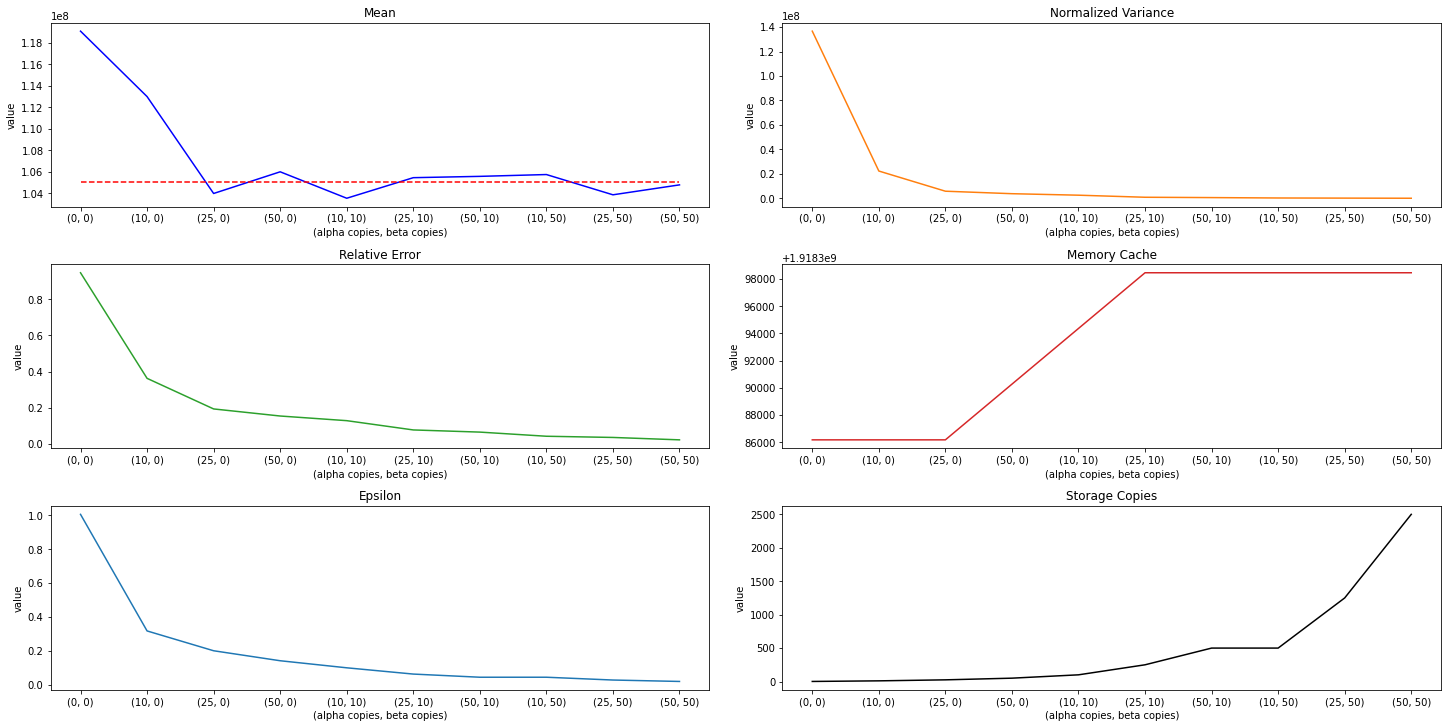

In [ ]:
def main():
    results, elements, counts, real_F2 = inititalization()
    run_alpha_version(results, elements, counts)
    run_beta_version(results, elements, counts)
    run_final_version(results, elements, counts)
    plot_results(results, real_F2)
    
main()

As we can see from the plots, as the alpha and beta copies increase, the relative error, the normalized variance and the epsilon parameter are decreasing while the memory usage and the copies storage are increasing, which is exactly what we expected to see.

Also, we can see by the Mean's plot, the estimator's mean converge to the real F2 (the red line) which is aligned with the teoretical material where the AMS estimator is an unbiased estimator for F2.

(Note that the epsilon parameter was calculated for a Delta value of 99%, and the exact values for each combination is printed above)